(50000, 28, 28) (50000,)


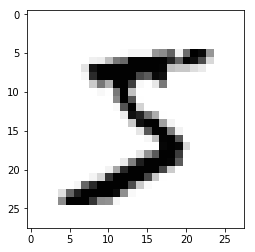

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
X_train = X_train.reshape([50000, 784])
X_test = X_test.reshape([10000, 784])

In [5]:
import tensorflow as tf

In [6]:
X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))
keep_prob = tf.placeholder(tf.float32)

In [7]:
W1 = tf.get_variable("W1",  [784, 128], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable("b1",  [128], initializer=tf.zeros_initializer())
W2 = tf.get_variable("W2",  [128, 128], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable("b2",  [128], initializer=tf.zeros_initializer())
W3 = tf.get_variable("W3", [128, 10], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.get_variable("b3",  [10], initializer=tf.zeros_initializer())
Z1 = tf.matmul(X, W1)+b1
A1 = tf.nn.relu(Z1)
A1 = tf.nn.dropout(A1, keep_prob)
Z2 = tf.matmul(A1, W2)+b2
A2 = tf.nn.relu(Z2)
A2 = tf.nn.dropout(A2, keep_prob)
Z3 = tf.matmul(A2, W3)+b3
A3 = tf.nn.sigmoid(Z3)


In [8]:
def compute_cost(A3, Y):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=A3))
    return cost

In [9]:
cost = compute_cost(A3, Y)
starter_learning_rate = 0.00036
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
init = tf.global_variables_initializer()


In [10]:
import numpy as np
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [11]:
X_train.shape

(50000, 784)

Test cost after 10 epochs: 1.51548
Test cost after 20 epochs: 1.49568
Test cost after 30 epochs: 1.48626
Test cost after 40 epochs: 1.48069
Test cost after 50 epochs: 1.47694
Test cost after 60 epochs: 1.47437
Test cost after 70 epochs: 1.47249
Test cost after 80 epochs: 1.47085
Test cost after 90 epochs: 1.46981
Test cost after 100 epochs: 1.46876


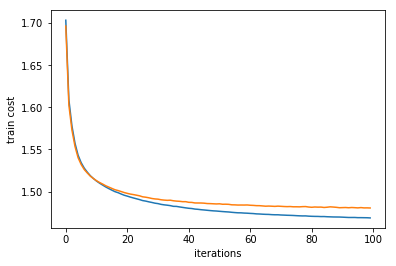

Train Accuracy: 0.99174
Test Accuracy: 0.9772


In [12]:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_costs = []
    test_costs = []
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size], keep_prob : 0.65})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train, keep_prob : 1}))
        test_costs.append(sess.run(cost, feed_dict={X:X_test, Y:y_test, keep_prob : 1}))
        if epoch%10 == 9:
            print("Test cost after " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))
    iterations = list(range(100))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, test_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()
    
    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train, keep_prob : 1})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test, keep_prob : 1})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)